## Домашнее задание по иммуногеномике #3. 
## Finding eQTLs of immunoglobulin genes.

__ИБ. осень 2020.__
__Чангалиди Антон__

The goal of this homework assignment is to learn techniques for finding eQTLs of antibody repertoires. To complete this assignment, perform the following steps:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from collections import defaultdict
from Bio import SeqIO
from Bio.Align.Applications import MuscleCommandline
from IPython.display import display, HTML

from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

### Task 1.
Download a dataframe containing usage values of gene IGHV1-2 collected across 85 healthy individuals. Usage values are provided in the “Usage” column. For each individual, haplotypes of IGHV1-2 were also computed and written to the “Haplotype” column. Haplotypes are described by IDs of alleles of IGHV1-2. For example, while a homozygous haplotype of individual 2 is described by allele IGHV1-2*04, a heterozygous haplotype of individual 1 is described by two alleles: IGHV1-2*02 and IGHV1-2*06. 

In [2]:
usage_data = pd.read_csv('IGHV1-2_usage.csv', index_col = 'SubjectID')
usage_data.head()

,Haplotype,Usage
SubjectID,,
1,2-6,0.106471
2,4,0.022486
3,2-6,0.075551
4,4,0.046183
5,4-6,0.059380


### Task 2.
For each unique haplotype, compute the number of individuals representing it and the mean usage of IGHV1-2. Fill Table 1 (add rows if needed):

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr"><span style="background-color:transparent"> 			</span>Haplotype<span style="background-color:transparent"> 		</span></th>
    <th class="tg-fymr"><span style="background-color:transparent"> 			</span># individuals<span style="background-color:transparent"> 		</span></th>
    <th class="tg-0lax"><span style="background-color:transparent"> 			</span>Mean usage<span style="background-color:transparent"> 		</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky"><span style="background-color:transparent"> 			Haplotype 1 		</span></td>
    <td class="tg-0pky"><span style="background-color:transparent"> 			N1 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			MU1 		</span></td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
  </tr>
</tbody>
</table>

In [3]:
def amount(array):
    return int(len(array))

haplotypes = usage_data.groupby('Haplotype').agg(
    individuals = pd.NamedAgg(column='Usage', aggfunc=amount),
    mean_usage = pd.NamedAgg(column='Usage', aggfunc='mean'), 
)
haplotypes

,individuals,mean_usage
Haplotype,,
2,17.0,0.086191
2-4,28.0,0.077451
2-6,6.0,0.086956
4,18.0,0.027895
4-6,14.0,0.071032
6,2.0,0.069571


### Task 3.
For each pair of haplotypes (H1, H2), compare their usages (U1 and U2) and compute a p-value showing the probability that U1 and U2 have the same means. For computing p-value, use the one-way ANOVA test. Fill Table 2 (add rows and columns if needed) and mark statistically significant pairs with * (e.g., H2-H3). Visualize usages across all haplotypes as a boxplot and add it below.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-fymr"><span style="background-color:transparent"> 			</span><br><span style="background-color:transparent">&nbsp;&nbsp;			 		</span></th>
    <th class="tg-fymr"><span style="background-color:transparent"> 			Haplotype 1 		</span></th>
    <th class="tg-0lax"><span style="background-color:transparent"> 			Haplotype 2 		</span></th>
    <th class="tg-0lax"><span style="background-color:transparent"> 			Haplotype 3 		</span></th>
    <th class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky"><span style="background-color:transparent"> 			Haplotype 1 		</span></td>
    <td class="tg-0pky"><span style="background-color:transparent"> 			- 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			p-val(H1, H2) 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			p-val(H1,H3) 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="background-color:transparent"> 			Haplotype 2 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			</span><br><span style="background-color:transparent">&nbsp;&nbsp;			 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			- 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			p-val(H2, H3)* 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="background-color:transparent"> 			Haplotype 3 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			</span><br><span style="background-color:transparent">&nbsp;&nbsp;			 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			</span><br><span style="background-color:transparent">&nbsp;&nbsp;			 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			- 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
  </tr>
  <tr>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
    <td class="tg-0lax"><span style="background-color:transparent"> 			... 		</span></td>
  </tr>
</tbody>
</table>

[insert a boxplot here: X = haplotypes, Y = usage values]



In [4]:
def draw_usages(plot_data, name):
    # sort keys and values together
    sorted_keys, sorted_vals = zip(*(plot_data.items()))

    fig, ax = plt.subplots(figsize=(10,7))
    ax.set_title(name, fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    # almost verbatim from question
    sns.set(context='notebook', style='whitegrid')
    sns.utils.axlabel(xlabel="Haplotypes", ylabel="Usage values", fontsize=16)
    sns.boxplot(data=sorted_vals, width=.18)
    # sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

    # category labels
    plt.xticks(plt.xticks()[0], sorted_keys)

    plt.show()

In [5]:
def return_usages(usage_data, haplo):
    return usage_data[usage_data.Haplotype == haplo].Usage.to_numpy()


pvals = pd.DataFrame(index=haplotypes.index, columns=haplotypes.index)
usages = {}
for h1, h2 in  np.transpose([np.tile(haplotypes.index, len(haplotypes.index)), np.repeat(haplotypes.index, len(haplotypes.index))]):
    if h1 == h2:
        continue
    usage_h1 = return_usages(usage_data, h1)
    usage_h2 = return_usages(usage_data, h2)
    if h1 not in usages:
        usages.update({h1:usage_h1})
    if h2 not in usages:
        usages.update({h2:usage_h2})
    pvals.loc[h1, h2] = f_oneway(usage_h1, usage_h2)[1]
pvals.style.apply(lambda x: ["background: lime" if v < 0.05 else "" for v in x], axis = 1)

Haplotype,2,2-4,2-6,4,4-6,6
Haplotype,,,,,,
2,nan,0.262472,0.946128,2.14521e-10,0.122661,0.384862
2-4,0.262472,nan,0.416132,2.82936e-09,0.475583,0.68996
2-6,0.946128,0.416132,nan,1.86807e-07,0.262569,0.473687
4,2.14521e-10,2.82936e-09,1.86807e-07,nan,6.57908e-06,0.00390406
4-6,0.122661,0.475583,0.262569,6.57908e-06,nan,0.950789
6,0.384862,0.68996,0.473687,0.00390406,0.950789,nan


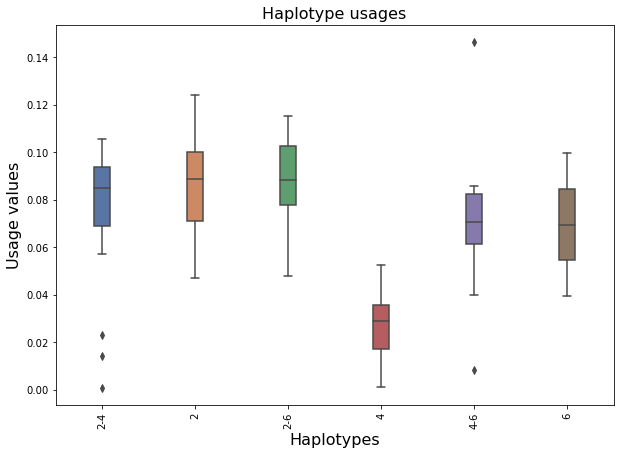

In [6]:
draw_usages(usages, 'Haplotype usages')

Ну да, тут видно, что 4-й очень сильно выбивается и на боксплоте, и pval у него ххороший по сравнению со ВСЕМИ другими.

### Task 4.
Extract sequences of alleles forming haplotypes in Table 1 from IGHV.fa and compute their multiple alignment. Identify SNPs (=differences) between alleles and, for each allele, describe them as pairs (N, P), where N is the nucleotide at position P in the multiple alignment. Fill Table 3 (add rows if needed).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
    <tr>
    <td class="tg-fymr"><span style="background-color:transparent"> 			Allele 1 		</span></td>
    <td class="tg-fymr"><span style="background-color:transparent"> 			A list of pairs (N, P) for all positions of SNPs 		</span></td>
  </tr>
  <tr>
    <td class="tg-0pky"><span style="background-color:transparent"> 			... 		</span></td>
    <td class="tg-0pky"><span style="background-color:transparent"> 			… 		</span></td>
  </tr>
</tbody>
</table>




In [7]:
needed_seqs = ['IGHV1-2*02', 'IGHV1-2*04', 'IGHV1-2*06']
seqs = []
for seq_record in SeqIO.parse("IGHV.fa", "fasta"):
    if seq_record.id in needed_seqs:
        seqs.append(seq_record)
        
#Write filtered data to file
SeqIO.write(seqs, "extracted_alleles.fasta", "fasta")
#Align sequences with MUSCLE (using parameters to make the alignment
#process as fast as possible)
muscle_cline = MuscleCommandline(input="extracted_alleles.fasta", 
                                 out="aligned_alleles.fasta", 
                                 diags = True, 
                                 maxiters = 10, 
                                 log="align_log.txt")
muscle_cline()

aligned_seqs = []
names = []
for seq_record in SeqIO.parse("aligned_alleles.fasta", "fasta"):
    aligned_seqs.append(str(seq_record.seq))
    names.append(seq_record.id)
    
snps = pd.DataFrame(columns=names)
i = 0
for i1, i2, i3 in zip(*aligned_seqs):
    i+=1
    if not (i1 == i2 and i2 == i3 and i1 == i3):
        snps.loc[i] = [i1, i2, i3]
snps.T

,148,199
IGHV1-2*04,T,T
IGHV1-2*06,C,A
IGHV1-2*02,T,A


### Task 5.
For each haplotype, compute a state for each SNP as a list of allele nucleotides. If a haplotype is homozygous, then its state N. If a haplotype is heterozygous, then its state is either N (if two alleles have the same nucleotide N), or N1/N2 (if two alleles have different nucleotides N1 and N2). Note that N1/N2 = N2/N1. Fill Table 4 (add rows if needed).

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-fymr{border-color:inherit;font-weight:bold;text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<tbody>
      <tr>
    <td class="tg-fymr"> 			Haplotype 1<span style="background-color:transparent"> 		</span></td>
    <td class="tg-fymr"> 			A list of states for all SNPs<span style="background-color:transparent"> 		</span></td>
  </tr>
  <tr>
    <td class="tg-0pky"> 			...<span style="background-color:transparent"> 		</span></td>
    <td class="tg-0pky"> 			…<span style="background-color:transparent"> 		</span></td>
  </tr>
</tbody>
</table>


In [8]:
haplo_snps = pd.DataFrame(columns = ['A list of states for all SNPs'])
for ind in haplotypes.index:
    genes = ind.split('-')
    if len(genes) == 1:
        genes.append(genes[0])
    answer = {}
    for pos in snps.index:
        let1, let2 = snps.loc[pos, 'IGHV1-2*0'+ genes[0]], snps.loc[pos, 'IGHV1-2*0'+ genes[1]]
        let1, let2 = min(let1, let2), max(let1, let2)
        answer.update({pos: f'{let1}/{let2}'})

    haplo_snps.loc[ind] = [answer]
    
haplo_snps

,A list of states for all SNPs
2,"{148: 'T/T', 199: 'A/A'}"
2-4,"{148: 'T/T', 199: 'A/T'}"
2-6,"{148: 'C/T', 199: 'A/A'}"
4,"{148: 'T/T', 199: 'T/T'}"
4-6,"{148: 'C/T', 199: 'A/T'}"
6,"{148: 'C/C', 199: 'A/A'}"


### Task 6.
As a result, each SNP is described by a set of states (e.g., A, A/C, C) across all haplotypes. For each SNP, add a boxplot showing the distribution of usages across its states. Compute a p-value showing association between SNP states and usages using the one-way ANOVA test. Comment on statistical significance of such association.  

[boxplot for SNP1: X = states, Y = usages]

[boxplot for SNP2: X = states, Y = usages]

In [9]:
pos = 0

def return_state(haplo):
    return haplo_snps.loc[haplo][0][pos]

for pos in snps.index:    
    usage_data[pos] = usage_data.Haplotype.apply(return_state)
usage_data

,Haplotype,Usage,148,199
SubjectID,,,,
1,2-6,0.106471,C/T,A/A
2,4,0.022486,T/T,T/T
3,2-6,0.075551,C/T,A/A
4,4,0.046183,T/T,T/T
5,4-6,0.059380,C/T,A/T
...,...,...,...,...
81,2,0.053374,T/T,A/A
82,2-4,0.091584,T/T,A/T
83,2,0.099734,T/T,A/A


In [10]:
def process_six(column, usage_data):
    def draw_usages(plot_data, name):
        # sort keys and values together
        sorted_keys, sorted_vals = zip(*(plot_data.items()))

        fig, ax = plt.subplots(figsize=(10,7))
        ax.set_title(name, fontsize=16)
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        # almost verbatim from question
        sns.set(context='notebook', style='whitegrid')
        sns.utils.axlabel(xlabel="States", ylabel="Usage values", fontsize=16)
        sns.boxplot(data=sorted_vals, width=.18)
        # sns.swarmplot(data=sorted_vals, size=6, edgecolor="black", linewidth=.9)

        # category labels
        plt.xticks(plt.xticks()[0], sorted_keys)

        plt.show()


    def return_usages(usage_data, haplo):
        return usage_data[usage_data[column] == haplo].Usage.to_numpy()


    def amount(array):
        return int(len(array))

    haplotypes = usage_data.groupby(column).agg(
        mean_usage = pd.NamedAgg(column='Usage', aggfunc='mean'), 
        individuals = pd.NamedAgg(column='Usage', aggfunc=amount)
    )

    
    pvals = pd.DataFrame(index=haplotypes.index, columns=haplotypes.index)
    usages = {}
    for h1, h2 in  np.transpose([np.tile(haplotypes.index, len(haplotypes.index)), np.repeat(haplotypes.index, len(haplotypes.index))]):
        if h1 == h2:
            continue
        usage_h1 = return_usages(usage_data, h1)
        usage_h2 = return_usages(usage_data, h2)
        if h1 not in usages:
            usages.update({h1:usage_h1})
        if h2 not in usages:
            usages.update({h2:usage_h2})
        pvals.loc[h1, h2] = f_oneway(usage_h1, usage_h2)[1]
    draw_usages(usages, f'Position {column} usages')
    
    display(pvals.style.apply(lambda x: ["background: lime" if v < 0.05 else "" for v in x], axis = 1))



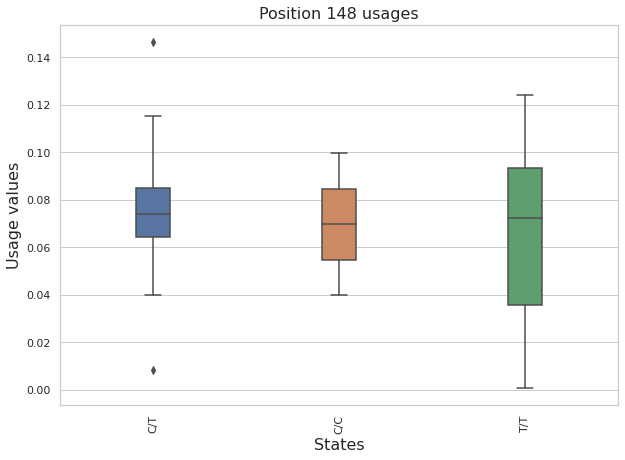

148,C/C,C/T,T/T
148,,,
C/C,nan,0.777095,0.869352
C/T,0.777095,nan,0.218257
T/T,0.869352,0.218257,nan


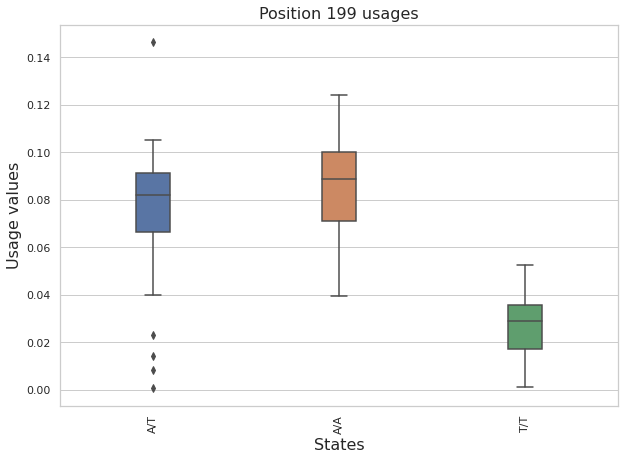

199,A/A,A/T,T/T
199,,,
A/A,nan,0.143339,2.93764e-11
A/T,0.143339,nan,2.75655e-09
T/T,2.93764e-11,2.75655e-09,nan


In [11]:
for pos in snps.index:
    process_six(pos, usage_data)

Можно сделать вывод, что в 148 позиции чего-то статистически значимого нет, однако в 199 позиции гомозигота по T имеет значительно более маленький usage, чем гомозигота по А и гетерозигота.